In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hd5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

This increases the accuracy and true positives

In [60]:
# Increases the accuracy to 98% and true positives by 14
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

This also does the same, but is less complex for an exchange of 4 true positives

In [7]:
# Increases accuracy to 98% and cm true positives by 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 2,704
Trainable params: 2,704
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
! pip install h5py==3.6.0

     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/2.8 MB 6.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/2.8 MB 6.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/2.8 MB 6.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/2.8 MB 6.3 MB/s eta 0:00:01
     ------- -------------------------------- 0.5/2.8 MB 2.2 MB/s eta 0:00:02
     ------------- -------------------------- 0.9/2.8 MB 3.2 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0:00:01
     --------------- ------------------------ 1.0/2.8 MB 3.5 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires flatbuffers>=23.5.26, but you have flatbuffers 2.0 which is incompatible.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.8.0 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.8.0 which is incompatible.
tensorflow-intel 2.15.0 requires tensorflow-estimator<2.16,>=2.15.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 8s - loss: 1.3512 - accuracy: 0.3281
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hd5
INFO:tensorflow:Assets written to: model/keypoint_classifier\keypoint_classifier.hd5\assets
29/29 [==============================] - 1s 24ms/step - loss: 1.2758 - accuracy: 0.3811 - val_loss: 1.2024 - val_accuracy: 0.4436
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2539 - accuracy: 0.3984
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hd5
INFO:tensorflow:Assets written to: model/keypoint_classifier\keypoint_classifier.hd5\assets
29/29 [==============================] - 0s 17ms/step - loss: 1.1901 - accuracy: 0.4471 - val_loss: 1.1028 - val_accuracy: 0.5789
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1152 - accuracy: 0.5156
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hd5
INFO:tensorflow:Assets written to: model/ke

model.save()

In [26]:
import h5py

In [12]:
model.save(model_save_path)

INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_classifier.hd5\assets


In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 885us/step - loss: 0.0985 - accuracy: 0.9799


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.8882443e-01 1.0930549e-02 2.4462157e-04 3.7535006e-07]
0


In [36]:
! pip install seaborn

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -------------------------- ----------- 112.6/160.4 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.6 kB 3.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.6 MB 4.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 3.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.6 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.6 MB 3.2 MB/s eta 0:00:03
   ----

# Confusion matrix

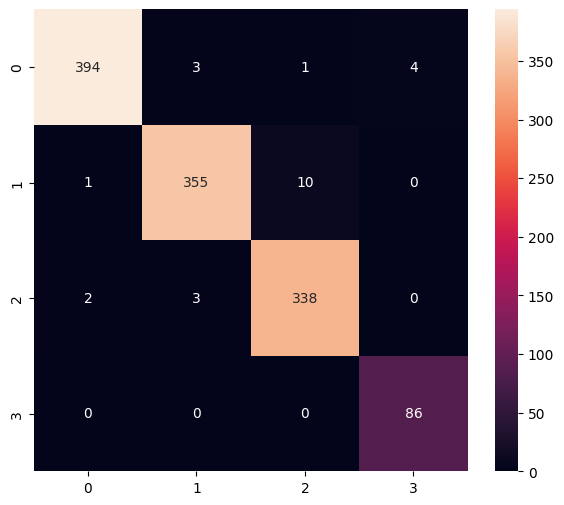

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       402
           1       0.98      0.97      0.98       366
           2       0.97      0.99      0.98       343
           3       0.96      1.00      0.98        86

    accuracy                           0.98      1197
   macro avg       0.97      0.98      0.98      1197
weighted avg       0.98      0.98      0.98      1197



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_classifier.hd5\assets


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\namit\AppData\Local\Temp\tmprw4a5ufy\assets


6544

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.03 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8831892e-01 1.1433757e-02 2.4683442e-04 4.3055968e-07]
0
